# Clustring

Clustering is a type of unsupervised machine learning technique used to group similar data points into clusters or groups based on certain characteristics or features. The goal of clustering is to identify natural groupings within a dataset, where data points within the same cluster are more similar to each other than to those in other clusters.

we will explore some methods and concepts like:
- k-means algorithm
- hierarchical clustring trees
- density-based clustring approach

categories of clustring:
- prototype-based clustring (centroid , medoid)
- hierarchical clustring
- density-based clustring

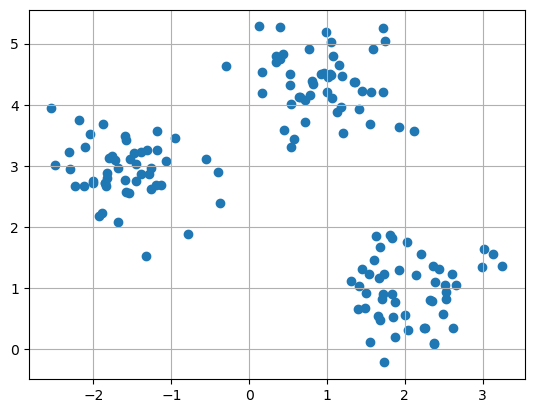

In [1]:
# our data

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150, n_features=2, random_state=0,
                  cluster_std=0.5, shuffle=True)

plt.scatter(X[:, 0], X[:, 1])
plt.grid()

# steps of k-means algorithm

1. Randomly pick k centroids from the examples as initial cluster centers.
2. Assign each example to the nearest centroid.
3. Move the centroids to the center of the examples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user- defined tolerance or maximum number of iterations is reached.


how do we measure similarity between objects? ----> squared Euclidean distance  ||| sum of squared errors (SSE) ||| cluster inertia

In [2]:
# apply k-means 

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(X)

In [3]:
X.shape

(150, 2)

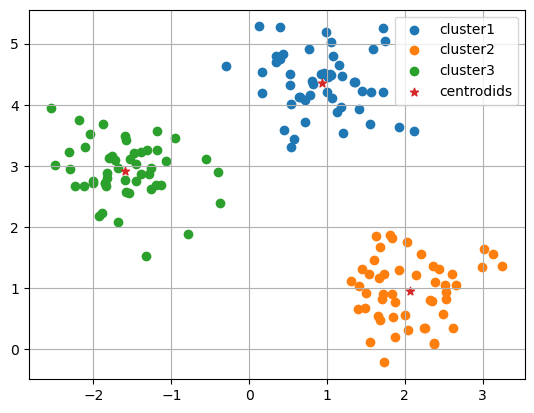

In [4]:
# scatter 

plt.scatter(X[y_km==0, 0], X[y_km==0, 1], label='cluster1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], label='cluster2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], label='cluster3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', label='centrodids')
plt.grid()
plt.legend()

# k-means++


this is an enhancement of the standard K-Means clustering algorithm that improves the initialization of cluster centroids.

The main purpose of K-Means++ is to provide a smarter way of choosing the initial centroids, which can lead to better clustering results and faster convergence of the algorithm.

steps:

Step 1: The first centroid is chosen randomly from the data points.

Step 2: For each remaining data point x, compute the distance D(x) between  x and the nearest already chosen centroid.

Step 3: Select the next centroid with a probability proportional to  D(x)^2. This means that points that are farther from the existing centroids have a higher chance of being chosen as the next centroid.

Step 4: Repeat Step 3 until k centroids have been chosen.

Step 5: Proceed with the standard K-Means algorithm using these k centroids.

In [5]:
# using k-means++ is easy :

km_pp = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

# ....

for comparing some clustriings we can use some intrinsic metrics like within-cluster SSE (distortion)

In [6]:
# within-cluster SSE (distortion)

print("Distortion: ", km.inertia_)

Distortion:  72.47601670996698


Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate the optimal number of clusters, k, for a given task.

In [7]:
distortions = []

for i in range(1, 11):
    kmean = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0, max_iter=300)
    kmean.fit(X)
    distortions.append(kmean.inertia_)

Text(0, 0.5, 'Distortion')

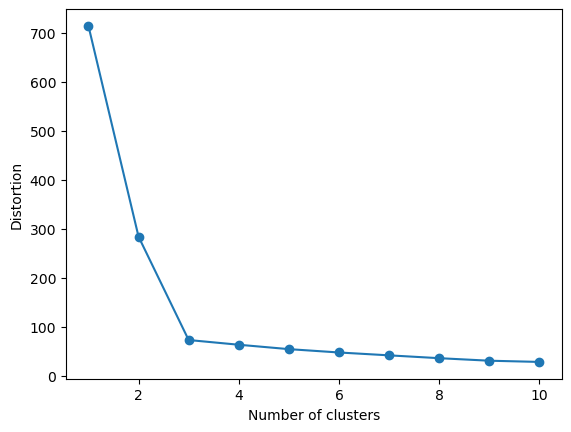

In [8]:
import numpy as np

plt.plot(np.arange(1, 11, 1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

so we can see that k=3 is a good choice.

# Quantifying the quality of clustering via silhouette plots

Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the examples in the clusters are.

In [9]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=1e-04, random_state=0, n_init=10)

y_km = km.fit_predict(X)

In [10]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_values = silhouette_samples(X, y, metric='euclidean') 

Text(0.5, 0, 'Silhouette coefficient')

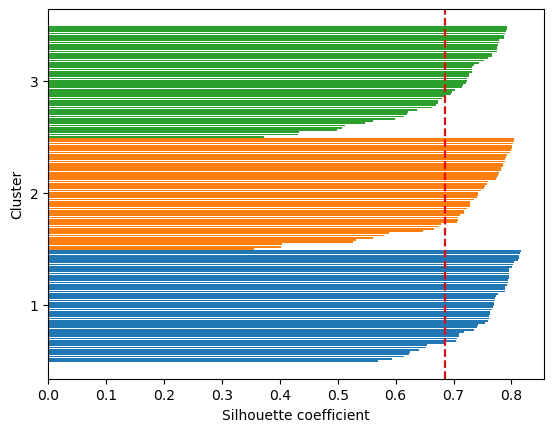

In [11]:
# visualizing

y_ax_lower, y_ax_upper = 0,0
y_ticks = []

for i, c in enumerate(cluster_labels):
    
    c_silhouette_vals = silhouette_values[y_km == c]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals)
    
    y_ticks.append((y_ax_lower+y_ax_upper)/2.)
    
    y_ax_lower += len(c_silhouette_vals)


silhouette_avg = np.mean(c_silhouette_vals)
plt.yticks(y_ticks, cluster_labels + 1)
plt.axvline(silhouette_avg, linestyle='--', color='red')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

as you can see in the preceding silhouette plot, the silhouette coefficients are not even close to 0, which is, in this case, an indicator of a good clustering.

# Organizing clusters as a hierarchical tree

hierarchical clustering:
- agglomerative hierarchical clustring (we will use this)
- divisive hierarchical clustring


agglomerative hierarchical clustring algorithms:
1- single linkage 
2- complete linkage

agglomerative clustering using the complete linkage:

1. Compute the distance matrix of all examples.
2. Represent each data point as a singleton cluster.
3. Merge the two closest clusters based on the distance between the most dissimilar (distant) members.
4. Update the similarity matrix.
5. Repeat steps 2-4 until one single cluster remains.

In [12]:
# random data

import pandas as pd
import numpy as np


np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


# Performing hierarchical clustering on a distance matrix


In [13]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [14]:
pdist(df, metric='euclidean')

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [15]:
from scipy.cluster.hierarchy import linkage


row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [16]:
# better look at linkage matrix

pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], index=[
             'cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


Text(0, 0.5, 'Euclidean distance')

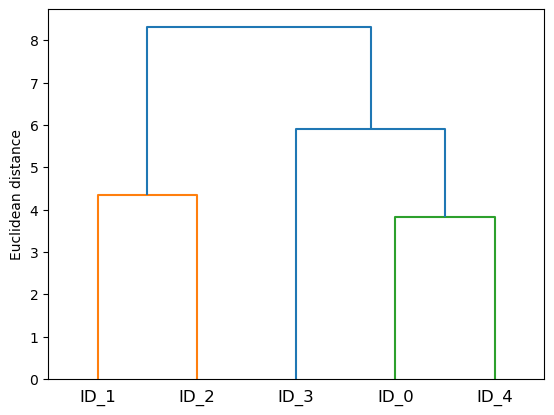

In [17]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)
plt.ylabel('Euclidean distance')

we can choose which clustring is better based on our need.

but there are some quantative factors that can tell us how much our model is good:

- Cophenetic Correlation Coefficient: : This measure assesses how well the clustering preserves the pairwise distances between points. It compares the cophenetic distances (the heights at which pairs of points are clustered) with the original pairwise distances. High Cophenetic Correlation: Indicates that the hierarchical clustering preserves the pairwise distances well.


- Silhouette Score:  The silhouette score measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates well-defined clusters. ---> Use the silhouette score to evaluate the quality of clustering for different numbers of clusters.




In [18]:
# Cophenetic Correlation Coefficient

from scipy.cluster.hierarchy import cophenet

c, _ = cophenet(row_clusters, pdist(df))

print("Cophenetic Correlation Coefficient:", c)

Cophenetic Correlation Coefficient: 0.6660418571124715


# Attaching dendrograms to a heat map

/tmp/ipykernel_316168/2886883380.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/tmp/ipykernel_316168/2886883380.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


[Text(0, -1.0, ''),
 Text(0, 0.0, 'ID_4'),
 Text(0, 1.0, 'ID_0'),
 Text(0, 2.0, 'ID_3'),
 Text(0, 3.0, 'ID_2'),
 Text(0, 4.0, 'ID_1'),
 Text(0, 5.0, '')]

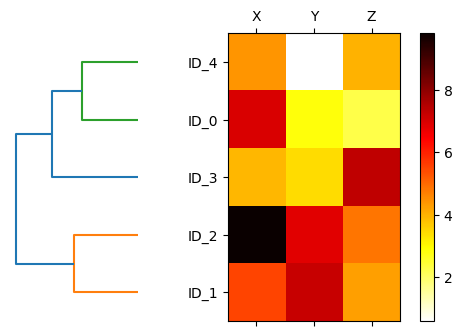

In [19]:
fig = plt.figure()
axd = fig.add_axes([0.1, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# Applying agglomerative clustering via scikit-learn

untill now we used sklearn for hierarchical clustring, but for now we gonna to use scikit-lean ...

In [20]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')

labels = ac.fit_predict(X)

print("cluster labels: ", labels)

cluster labels:  [1 0 0 2 1]


# Locating regions of high density via DBSCAN

### density-based spatial clustering of applications with noise (DBSCAN)

As its name implies, density-based clustering assigns cluster labels based on dense regions of points.
In DBSCAN, the notion of density is defined as the number of points within a specified radius, 𝜀.

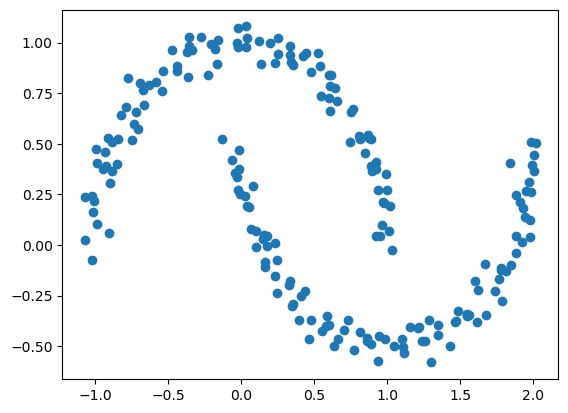

In [21]:
# making datga
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1])

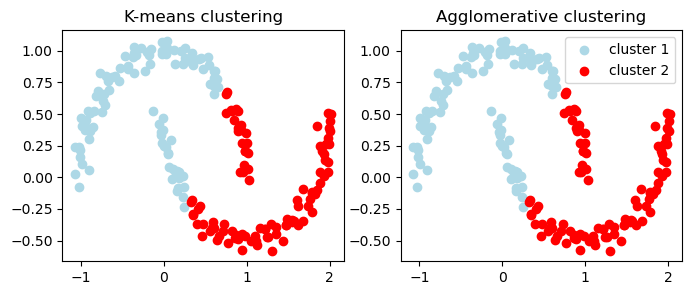

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0, n_init=10)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', label='cluster 2')

ax1.set_title('K-means clustering')
ax2.set_title('Agglomerative clustering')

ac = AgglomerativeClustering(
    n_clusters=2, metric='euclidean', linkage='complete')

y_ac = ac.fit_predict(X)

ax2.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', label='cluster 1')
ax2.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', label='cluster 2')

plt.legend()

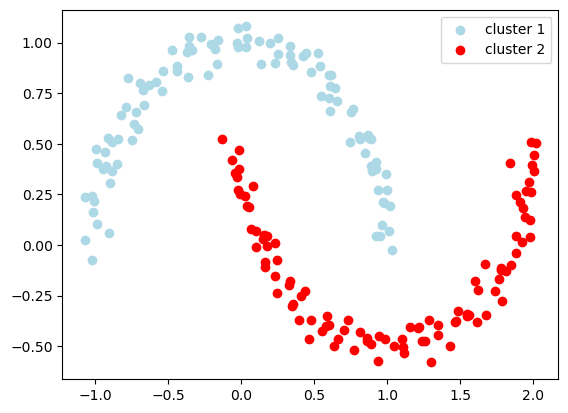

In [43]:
# DBSCAN algorithm

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db==0, 0], X[y_db==0,1], c='lightblue', label='cluster 1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], c='red', label='cluster 2')
plt.legend()

we can see that the DBSCAN could do it's job very well.